In [1]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
warnings.simplefilter("ignore")

In [3]:
np.random.seed(1)

In [4]:
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import RandomUniform

Using TensorFlow backend.


In [5]:
train2 = loadtxt("/home/umair/Desktop/Data Science and BI/machine learning/Monk/monks-2.train",
                         delimiter=' ', usecols=range(1, 8))
test2 = loadtxt("/home/umair/Desktop/Data Science and BI/machine learning/Monk/monks-2.test',
                        delimiter=' ', usecols=range(1, 8))


In [6]:
X_train2=train2[:, 1:7]
y_train2=train2[:, 0]

X_test2=test2[:, 1:7]
y_test2=test2[:, 0]

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc=OneHotEncoder()

In [9]:
X_train2=enc.fit_transform(X_train2).toarray()

X_test2=enc.fit_transform(X_test2).toarray()

In [10]:
def create_modelCV(lr=0.1, mom=0.1, act='relu'):
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, kernel_initializer=RandomUniform(minval=-0.1, maxval=0.1, seed=1), 
                    activation=act,
                   kernel_regularizer=l2(0.0001)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer= SGD(lr=lr, momentum=mom, nesterov=False))
    return model

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


hyper_params_space = {
        'lr': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        'mom': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8],
        'act': ['sigmoid', 'relu']
    },



print('===================================')
model = KerasClassifier(build_fn=create_modelCV, batch_size=25, epochs=100)
mlpr = GridSearchCV( model
                    , hyper_params_space, scoring=['accuracy'], refit='accuracy', cv=3, n_jobs=2)
mlpr.fit(X_train2, y_train2)
print("DONE")
resultGSCV=pd.DataFrame(mlpr.cv_results_)

#




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
169/169 [==============================] - 0s 543us/step - loss: 0.2477 - accuracy: 0.5740
Epoch 2/100
169/169 [==============================] - 0s 162us/step - loss: 0.2394 - accuracy: 0.6213
Epoch 3/100
169/169 [==============================] - 0s 138us/step - loss: 0.2362 - accuracy: 0.6213
Epoch 4/100
169/169 [==============================] - 0s 127us/step - loss: 0.2344 - accuracy: 0.6213
Epoch 5/100
169/169 [==============================] - 0s 123us/step - loss: 0.2340 - accuracy: 0.6213
Epoch 6/100
169/169 [==============================] - 0s 90us/step - loss: 0.2333 - accuracy: 0.6213
Epoch 7/100
169/169 [==============================] - 0s 112us/step - loss: 0.2310 - accuracy: 0.6213
Epoch 8/100
169/169 [==============================] - 0s 106us/step - loss: 0.2298 - accuracy: 0.6213
Epoch 9/100
169/169 [==============================] - 0s

In [12]:
mlpr.best_params_

{'act': 'relu', 'lr': 0.5, 'mom': 0.2}

In [13]:
def create_modelOP():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, kernel_initializer=RandomUniform(minval=-0.1, maxval=0.1, seed=1), 
                    activation=mlpr.best_params_['act'],
                   kernel_regularizer=l2(0.0001)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], 
                  optimizer= SGD(lr=mlpr.best_params_['lr'], momentum=mlpr.best_params_['mom']))
    return model

In [14]:
#instantiate the model and run it
#es = EarlyStopping(monitor='val_loss', patience=30)
#mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model1 = create_modelOP()

history1 = model1.fit(X_train2, y_train2, 
                      validation_data=(X_test2, y_test2), 
                      epochs=100, 
                      batch_size=25, 
                      #callbacks=[es,mc]
                     ).history

Train on 169 samples, validate on 432 samples
Epoch 1/100
169/169 [==============================] - 0s 733us/step - loss: 0.2387 - accuracy: 0.6095 - val_loss: 0.2232 - val_accuracy: 0.6713
Epoch 2/100
169/169 [==============================] - 0s 150us/step - loss: 0.2319 - accuracy: 0.6272 - val_loss: 0.2208 - val_accuracy: 0.6713
Epoch 3/100
169/169 [==============================] - 0s 174us/step - loss: 0.2280 - accuracy: 0.6213 - val_loss: 0.2217 - val_accuracy: 0.6644
Epoch 4/100
169/169 [==============================] - 0s 175us/step - loss: 0.2235 - accuracy: 0.6391 - val_loss: 0.2166 - val_accuracy: 0.6620
Epoch 5/100
169/169 [==============================] - 0s 157us/step - loss: 0.2139 - accuracy: 0.6568 - val_loss: 0.2048 - val_accuracy: 0.6667
Epoch 6/100
169/169 [==============================] - 0s 166us/step - loss: 0.2051 - accuracy: 0.6509 - val_loss: 0.1963 - val_accuracy: 0.6644
Epoch 7/100
169/169 [==============================] - 0s 152us/step - loss: 0.1953 

Epoch 57/100
169/169 [==============================] - 0s 156us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 58/100
169/169 [==============================] - 0s 161us/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 59/100
169/169 [==============================] - 0s 140us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 60/100
169/169 [==============================] - 0s 179us/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 61/100
169/169 [==============================] - 0s 153us/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 62/100
169/169 [==============================] - 0s 165us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 63/100
169/169 [==============================] - 0s 162us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0071 -

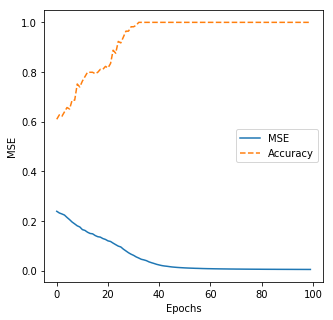

In [21]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['loss'], label='MSE')
plt.plot(history1['accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for training', fontsize = 18)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

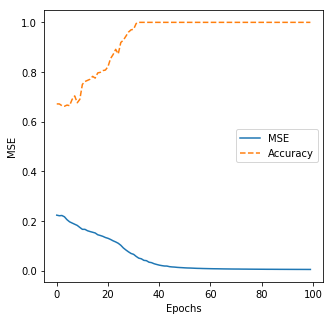

In [22]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['val_loss'], label='MSE')
plt.plot(history1['val_accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for test', fontsize = 18)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [17]:
mse, accuracy = model1.evaluate(X_test2, y_test2)

432/432 [==============================] - 0s 27us/step


In [18]:
print("Accuracy on Test", accuracy)
print("MSE on Test", mse)

Accuracy on Test 1.0
MSE on Test 0.004396483560817109


In [19]:
mse_tr, accuracy_tr = model1.evaluate(X_train2, y_train2)

169/169 [==============================] - 0s 50us/step


In [20]:
print("Accuracy on Training", accuracy_tr)
print("MSE on Training", mse_tr)

Accuracy on Training 1.0
MSE on Training 0.004297534670658718
